Parameters of the largest circle:
Center: (110, 258)
Radius: 15
Sigma value: 2.0


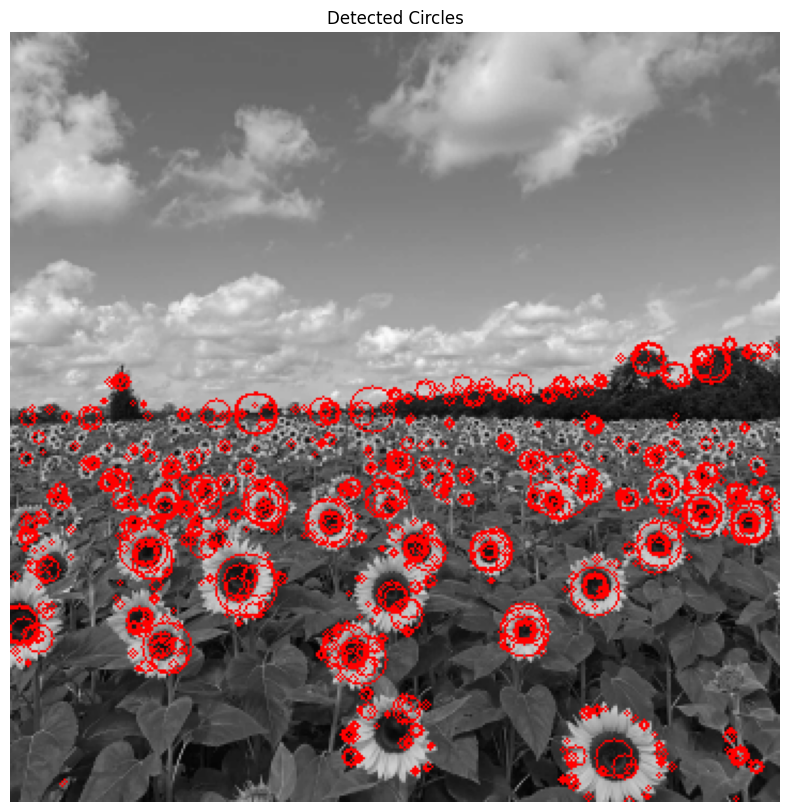

In [24]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the sunflower field image
image = cv2.imread('the_berry_farms_sunflower_field.jpeg', cv2.IMREAD_REDUCED_COLOR_4)
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Set up parameters for scale-space extrema detection
min_sigma = 1.0  # Minimum sigma value (smaller values for smaller blobs)
max_sigma = 2.0  # Maximum sigma value (larger values for larger blobs)
num_sigma = 5 # Number of sigma values to test
threshold = 0.35  # Threshold for blob detection

# Create an empty list to store detected circles
circles = []

# Loop through different sigma values to detect blobs at different scales
for sigma in np.linspace(min_sigma, max_sigma, num_sigma):
    # Apply LoG (Laplacian of Gaussian) to the grayscale image with the current sigma
    blurred = cv2.GaussianBlur(gray_image, (0, 0), sigma)
    laplacian = cv2.Laplacian(blurred, cv2.CV_64F)

    # Calculate the absolute Laplacian values
    abs_laplacian = np.abs(laplacian)

    # Create a binary image where blobs are detected using the threshold
    blob_mask = abs_laplacian > threshold * abs_laplacian.max()

    # Find contours in the blob mask
    contours, _ = cv2.findContours(blob_mask.astype(np.uint8), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Loop through the detected contours and fit circles to them
    for contour in contours:
        if len(contour) >= 5:
            (x, y), radius = cv2.minEnclosingCircle(contour)
            center = (int(x), int(y))
            radius = int(radius)
            circles.append((center, radius, sigma))

# Sort the detected circles by radius in descending order
circles.sort(key=lambda x: -x[1])

# Report the parameters of the largest circle
largest_circle = circles[0]
center, radius, sigma = largest_circle

print("Parameters of the largest circle:")
print(f"Center: {center}")
print(f"Radius: {radius}")
print(f"Sigma value: {sigma}")

# Set the desired line thickness for drawn circles
line_thickness = 1

# Draw all detected circles with the specified line thickness
output_image = cv2.cvtColor(gray_image, cv2.COLOR_GRAY2BGR)
for circle in circles:
    center, radius, _ = circle
    cv2.circle(output_image, center, radius, (0, 0, 255), line_thickness)  # Red color

# Display the grayscale image with detected circles using matplotlib
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(output_image, cv2.COLOR_BGR2RGB), cmap='gray')
plt.axis('off')
plt.title('Detected Circles')
plt.show()



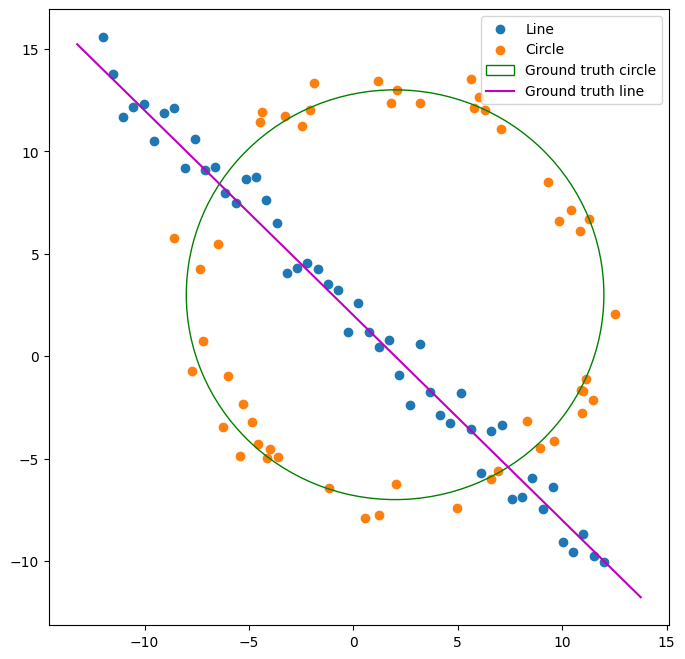

In [25]:
import numpy as np
import matplotlib.pyplot as plt

# Set random seed for reproducibility (if needed)
# np.random.seed(0)

N = 100
half_n = N // 2
r = 10
x0_gt, y0_gt = 2, 3  # Center
s = r / 16

# Generate random points for the circle
t = np.random.uniform(0, 2 * np.pi, half_n)
n = s * np.random.randn(half_n)
x, y = x0_gt + (r + n) * np.cos(t), y0_gt + (r + n) * np.sin(t)
X_circ = np.hstack((x.reshape(half_n, 1), y.reshape(half_n, 1)))

s = 1.
m, b = -1, 2

# Generate random points for the line
x = np.linspace(-12, 12, half_n)
y = m * x + b + s * np.random.randn(half_n)
X_line = np.hstack((x.reshape(half_n, 1), y.reshape(half_n, 1)))

# Combine points from both the circle and line
X = np.vstack((X_circ, X_line))

# Create a figure and axis for plotting
fig, ax = plt.subplots(1, 1, figsize=(8, 8))

# Scatter plot for the line and circle points
ax.scatter(X_line[:, 0], X_line[:, 1], label='Line')
ax.scatter(X_circ[:, 0], X_circ[:, 1], label='Circle')

# Plot the ground truth circle
circle_gt = plt.Circle((x0_gt, y0_gt), r, color='g', fill=False, label='Ground truth circle')
ax.add_patch(circle_gt)

# Plot the ground truth line
x_min, x_max = ax.get_xlim()
x_ = np.array([x_min, x_max])
y_ = m * x_ + b
plt.plot(x_, y_, color='m', label='Ground truth line')

# Add a legend
plt.legend()

# Show the plot
plt.show()


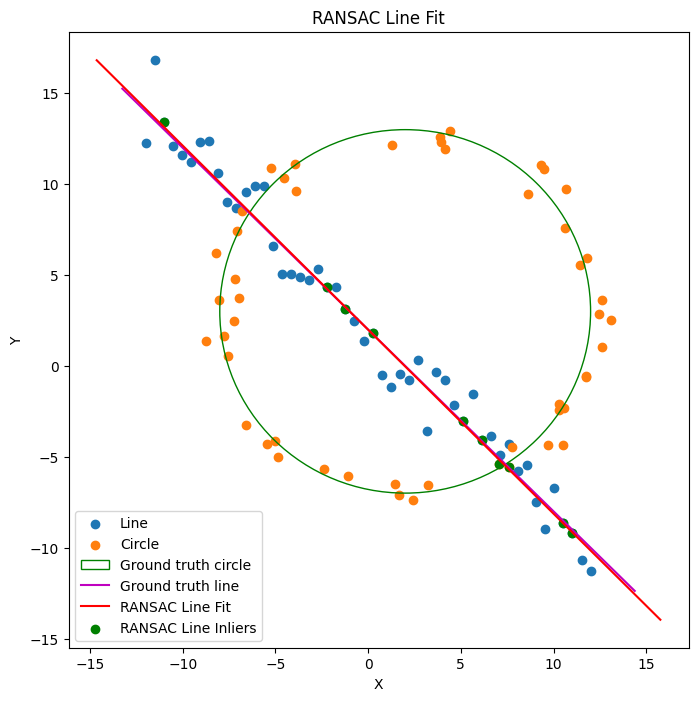

Estimated line parameters:
a: -0.7115357583405916
b: -0.7026498876415472
d: 1.401973061292411


In [53]:
import numpy as np
import matplotlib.pyplot as plt


N = 100
half_n = N // 2
r = 10
x0_gt, y0_gt = 2, 3  # Center
s = r / 16

# Generate random points for the circle
t = np.random.uniform(0, 2 * np.pi, half_n)
n = s * np.random.randn(half_n)
x, y = x0_gt + (r + n) * np.cos(t), y0_gt + (r + n) * np.sin(t)
X_circ = np.hstack((x.reshape(half_n, 1), y.reshape(half_n, 1)))

s = 1.
m, b = -1, 2

# Generate random points for the line
x = np.linspace(-12, 12, half_n)
y = m * x + b + s * np.random.randn(half_n)
X_line = np.hstack((x.reshape(half_n, 1), y.reshape(half_n, 1)))

# Combine points from both the circle and line
X = np.vstack((X_circ, X_line))

# Create a figure and axis for plotting
fig, ax = plt.subplots(1, 1, figsize=(8, 8))

# Scatter plot for the line and circle points
ax.scatter(X_line[:, 0], X_line[:, 1], label='Line')
ax.scatter(X_circ[:, 0], X_circ[:, 1], label='Circle')

# Plot the ground truth circle
circle_gt = plt.Circle((x0_gt, y0_gt), r, color='g', fill=False, label='Ground truth circle')
ax.add_patch(circle_gt)

# Plot the ground truth line
x_min, x_max = ax.get_xlim()
x_ = np.array([x_min, x_max])
y_ = m * x_ + b
plt.plot(x_, y_, color='m', label='Ground truth line')

# Define a function for line fitting (error computation)
def line_error(params, data):
    a, b, d = params
    x, y = data[:, 0], data[:, 1]
    return np.abs(a * x + b * y + d) / np.sqrt(a ** 2 + b ** 2)

# RANSAC parameters
num_iterations = 10000
threshold_line = 0.01
num_consensus_line = 8

best_line = None
best_line_inliers = []

for _ in range(num_iterations):
    # Randomly select two points from the data
    sample_indices = np.random.choice(N, 2, replace=False)
    sample_data = X[sample_indices]

    # Fit a line to the sample data
    x1, y1 = sample_data[0]
    x2, y2 = sample_data[1]

    # Compute the line parameters
    a = y2 - y1
    b = x1 - x2
    d = x2 * y1 - x1 * y2

    # Normalize (a,b) to unit length
    norm = np.sqrt(a ** 2 + b ** 2)
    a /= norm
    b /= norm

    # Compute the error(distance) for all points with respect to the line
    distances = np.abs(a * X[:, 0] + b * X[:, 1] + d) / norm

    # Find the inliers that are within the threshold distance
    inliers = np.where(distances < threshold_line)[0]

    # If the number of inliers is greater than the consensus threshold, update the best model inliers
    if len(inliers) >= num_consensus_line and len(inliers) > len(best_line_inliers):
        best_line = (a, b, d)
        best_line_inliers = inliers

# Extract the best line parameters
best_a, best_b, best_d = best_line

# Plot the RANSAC Line Fit
x_min, x_max = ax.get_xlim()
x_plot = np.array([x_min, x_max])
y_plot = (-best_a / best_b) * x_plot - (best_d / best_b)
ax.plot(x_plot, y_plot, color='r', label='RANSAC Line Fit')
ax.scatter(X[best_line_inliers][:, 0], X[best_line_inliers][:, 1], color='g', label='RANSAC Line Inliers')

# Add a legend
plt.legend()

# Show the plot
plt.title('RANSAC Line Fit')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

# Print the best line parameters
print("Estimated line parameters:")
print(f"a: {best_a}")
print(f"b: {best_b}")
print(f"d: {best_d}")




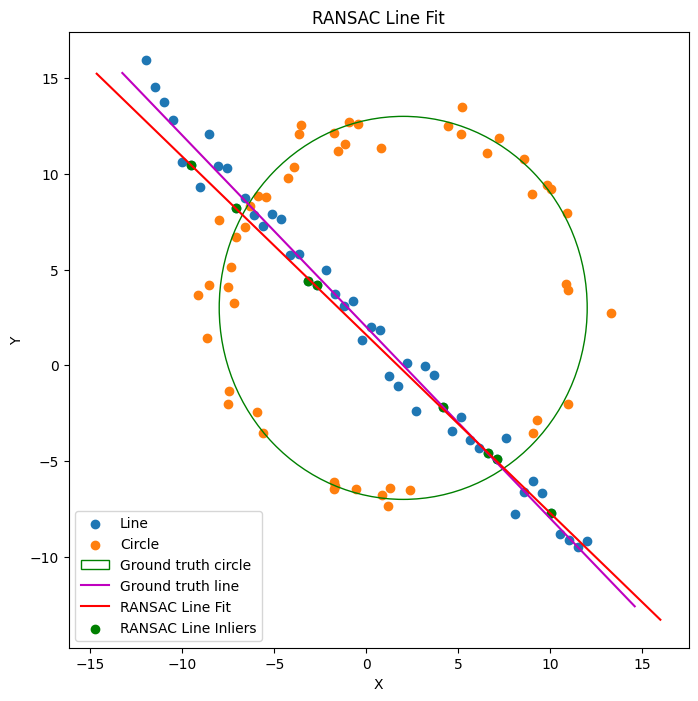

Estimated line parameters:
a: -0.681285611199753
b: -0.7320177019527458
d: 1.160505791135808
RANSAC Circle Fitting (After Subtracting Best Line Inliers) did not find a valid circle.


In [79]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

N = 100
half_n = N // 2
r = 10
x0_gt, y0_gt = 2, 3  # Center
s = r / 16

# Generate random points for the circle
t = np.random.uniform(0, 2 * np.pi, half_n)
n = s * np.random.randn(half_n)
x, y = x0_gt + (r + n) * np.cos(t), y0_gt + (r + n) * np.sin(t)
X_circ = np.hstack((x.reshape(half_n, 1), y.reshape(half_n, 1)))

s = 1.
m, b = -1, 2

# Generate random points for the line
x = np.linspace(-12, 12, half_n)
y = m * x + b + s * np.random.randn(half_n)
X_line = np.hstack((x.reshape(half_n, 1), y.reshape(half_n, 1)))

# Combine points from both the circle and line
X = np.vstack((X_circ, X_line))

# Create a figure and axis for plotting
fig, ax = plt.subplots(1, 1, figsize=(8, 8))

# Scatter plot for the line and circle points
ax.scatter(X_line[:, 0], X_line[:, 1], label='Line')
ax.scatter(X_circ[:, 0], X_circ[:, 1], label='Circle')

# Plot the ground truth circle
circle_gt = plt.Circle((x0_gt, y0_gt), r, color='g', fill=False, label='Ground truth circle')
ax.add_patch(circle_gt)

# Plot the ground truth line
x_min, x_max = ax.get_xlim()
x_ = np.array([x_min, x_max])
y_ = m * x_ + b
plt.plot(x_, y_, color='m', label='Ground truth line')

# Define a function for line fitting (error computation)
def line_error(params, data):
    a, b, d = params
    x, y = data[:, 0], data[:, 1]
    return np.abs(a * x + b * y + d) / np.sqrt(a ** 2 + b ** 2)

# RANSAC parameters
num_iterations = 10000
threshold_line = 0.01
num_consensus_line = 8

best_line = None
best_line_inliers = []

for _ in range(num_iterations):
    # Randomly select two points from the data
    sample_indices = np.random.choice(N, 2, replace=False)
    sample_data = X[sample_indices]

    # Fit a line to the sample data
    x1, y1 = sample_data[0]
    x2, y2 = sample_data[1]

    # Compute the line parameters
    a = y2 - y1
    b = x1 - x2
    d = x2 * y1 - x1 * y2

    # Normalize (a,b) to unit length
    norm = np.sqrt(a ** 2 + b ** 2)
    a /= norm
    b /= norm

    # Compute the error(distance) for all points with respect to the line
    distances = np.abs(a * X[:, 0] + b * X[:, 1] + d) / norm

    # Find the inliers that are within the threshold distance
    inliers = np.where(distances < threshold_line)[0]

    # If the number of inliers is greater than the consensus threshold, update the best model inliers
    if len(inliers) >= num_consensus_line and len(inliers) > len(best_line_inliers):
        best_line = (a, b, d)
        best_line_inliers = inliers

# Extract the best line parameters
best_a, best_b, best_d = best_line

# Plot the RANSAC Line Fit
x_min, x_max = ax.get_xlim()
x_plot = np.array([x_min, x_max])
y_plot = (-best_a / best_b) * x_plot - (best_d / best_b)
ax.plot(x_plot, y_plot, color='r', label='RANSAC Line Fit')
ax.scatter(X[best_line_inliers][:, 0], X[best_line_inliers][:, 1], color='g', label='RANSAC Line Inliers')

# Add a legend
plt.legend()

# Show the plot
plt.title('RANSAC Line Fit')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

# Print the best line parameters
print("Estimated line parameters:")
print(f"a: {best_a}")
print(f"b: {best_b}")
print(f"d: {best_d}")


# Create a remnant dataset by removing the inliers of the best line
X_remnant = np.delete(X, best_line_inliers, axis=0)

# Define a function for circle fitting (error computation)
def circle_error(params, data):
    x0, y0, r = params
    x, y = data[:, 0], data[:, 1]
    return np.abs((x - x0) ** 2 + (y - y0) ** 2 - r ** 2)

# RANSAC parameters for circle fitting
num_iterations_circle = 10000
threshold_circle = 0.1  # Adjust this threshold as needed
num_consensus_circle = 8  # Adjust this consensus threshold as needed

best_circle = None
best_circle_inliers = []

for _ in range(num_iterations_circle):
    # Randomly select three points from the remnant data
    sample_indices = np.random.choice(len(X_remnant), 3, replace=False)
    sample_data = X_remnant[sample_indices]

    # Use an optimizer to fit a circle to the sample data
    result = minimize(lambda params: np.sum(circle_error(params, sample_data)), (0, 0, 1), method='Nelder-Mead')

    # Extract the circle parameters
    x0, y0, r = result.x

    # Calculate the error (radial distance) for all points with respect to the circle
    errors = circle_error((x0, y0, r), X_remnant)

    # Find the inliers that are within the threshold radial error
    inliers = np.where(errors < threshold_circle)[0]

    # If the number of inliers is greater than the consensus threshold, update the best model inliers
    if len(inliers) >= num_consensus_circle and len(inliers) > len(best_circle_inliers):
        best_circle = (x0, y0, r)
        best_circle_inliers = inliers

# Check if a valid circle was found
if best_circle is not None:
    # Extract the best circle parameters
    best_x0, best_y0, best_r = best_circle

    # Plot the RANSAC Circle Fit
    fig, ax = plt.subplots(1, 1, figsize=(8, 8))
    ax.scatter(X_remnant[:, 0], X_remnant[:, 1], color='b', label='Remnant Points')
    circle_fit = plt.Circle((best_x0, best_y0), best_r, color='orange', fill=False, label='RANSAC Circle Fit')
    ax.add_patch(circle_fit)

    # Add a legend
    plt.legend()

    # Show the plot
    plt.title('RANSAC Circle Fit (After Subtracting Best Line Inliers)')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.show()

    # Print the best circle parameters
    print("Estimated circle parameters:")
    print(f"x0: {best_x0}")
    print(f"y0: {best_y0}")
    print(f"r: {best_r}")
else:
    print("RANSAC Circle Fitting (After Subtracting Best Line Inliers) did not find a valid circle.")


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the architectural image and the flag image
architectural_image = cv2.imread('architectural_image.jpg')
flag_image = cv2.imread('flag_image.png')

# Define the four points on the architectural image that form a planar surface
# These points should be selected to define the plane where you want to overlay the flag
points_on_architecture = np.array([[x1, y1], [x2, y2], [x3, y3], [x4, y4]], dtype=np.float32)

# Define the corresponding points on the flag image (in the same order)
points_on_flag = np.array([[0, 0], [flag_image.shape[1], 0], [flag_image.shape[1], flag_image.shape[0]], [0, flag_image.shape[0]]], dtype=np.float32)

# Compute the homography matrix
homography_matrix, _ = cv2.findHomography(points_on_flag, points_on_architecture)

# Warp the flag image onto the architectural image using the homography
flag_warped = cv2.warpPerspective(flag_image, homography_matrix, (architectural_image.shape[1], architectural_image.shape[0]))

# Blend the warped flag image with the architectural image
result_image = cv2.addWeighted(architectural_image, 1, flag_warped, 0.7, 0)

# Display the result using Matplotlib
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(result_image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()
